# ProSettings Data
## Imports

In [2]:
import os
import time
import matplotlib.pyplot as plt
from numpy import dtype

import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver

## Get Table Function

In [3]:
def get_table(url):
    """
    Get table from url
    """
    driver = webdriver.Chrome(executable_path=os.path.abspath("chromedriver"))
    driver.implicitly_wait(5)
    driver.get(url)
    driver.maximize_window()

    time.sleep(5)

    html = driver.page_source
    driver.quit()
    soup = BeautifulSoup(html, "html.parser")
    table = soup.find("table")

    # Save table to file
    with open("table.html", "w", encoding="utf-8") as file:
        file.write(str(table))

    return table

## Set URL

In [4]:
url = "https://prosettings.net/cs-go-pro-settings-gear-list/"

## Extract Data from ProSettings

In [5]:
table = get_table(url)

C:\Users\Walks\AppData\Local\Temp\ipykernel_3164\3675173765.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=os.path.abspath("chromedriver"))


## Create Dataframe

In [51]:
dataframe = pd.read_html(table.prettify())[0]
dataframe = dataframe.dropna(how="all")

# Filter out rows where "Team" column isn't one of:
# "FaZe Clan", "NaVi", "Cloud9", "ENCE", "Astralis", "Vitality", "MR", "G2", "NiP", "MOUZ", "FURIA", "BIG", "Heroic", "Liquid" or "Spirit"
team_list = ["FaZe Clan", "NaVi", "Cloud9", "ENCE", "Astralis", "Vitality", "MR", "G2", "NiP", "MOUZ", "FURIA", "BIG", "Heroic", "Liquid", "Spirit"]
# Check if any are missing
missing_teams = [team for team in team_list if team not in dataframe["Team"].unique()]
if missing_teams:
    print("Missing teams:", missing_teams)
    raise ValueError("Missing teams")
dataframe = dataframe[dataframe["Team"].isin(team_list)]

## Peek at Data

In [52]:
dataframe

,Team,Player,Role,Mouse,M. HZ,DPI,Sens,eDPI,Zoom Sens,Accel,...,Monitor,HZ,GPU,Resolution,Aspect Ratio,Scaling Mode,Mousepad,Keyboard,Headset,CFG
2,NaVi,electronic,Rifler,Logitech G Pro X Superlight White,1000.0,400.0,2.20,880.0,1.05,0.0,...,BenQ XL2546K,240.0,RX 6900 XT,1280x960,4:3,STR,Logitech G640,Logitech G915 TKL White,Logitech G Pro X Wireless Headset,CONFIG
3,NaVi,sdy,Rifler,FinalMouse Starlight 12 Phantom,1000.0,800.0,1.00,800.0,1.00,0.0,...,BenQ XL2546K,240.0,RTX 3080,1280x1024,5:4,STR,Logitech G640 NAVI,Logitech G915 TKL,Logitech G Pro X Headset,CONFIG
4,NaVi,s1mple,AWPer,Logitech G Pro X Superlight White,1000.0,400.0,3.09,1236.0,1.00,0.0,...,BenQ XL2546K,240.0,RTX 3090,1280x960,4:3,STR,HATOR It's nice to be s1mple,Logitech G915 TKL,Logitech G Pro X Headset,CONFIG
5,NaVi,Perfecto,Rifler,Logitech G Pro X Superlight Magenta,1000.0,800.0,0.90,720.0,1.00,0.0,...,BenQ XL2546K,240.0,RX 6900 XT,1280x960,4:3,STR,Logitech G640,Logitech G915 TKL,Logitech G Pro X Headset,CONFIG
6,NaVi,b1t,Rifler,Logitech G Pro X Superlight White,1000.0,400.0,1.42,568.0,1.00,0.0,...,BenQ XL2546,240.0,RTX 3080,1280x960,4:3,STR,Zowie G-SR,Logitech G Pro X Mechanical Keyboard,Logitech G Pro X Headset,CONFIG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,MR,dav1g,Rifler,Logitech G Pro X Superlight Black,1000.0,400.0,2.20,880.0,1.00,0.0,...,BenQ XL2546K,240.0,RTX 3070,1280x800,16:10,STR,VAXEE PA ZYGEN,Logitech G915 TKL,HyperX Cloud II,CONFIG
192,MR,DeathZz,Rifler,VAXEE OUTSET AX Yellow,1000.0,400.0,2.25,900.0,1.10,0.0,...,BenQ XL2546K,240.0,RTX 3070,1680x1050,16:10,STR,VAXEE PA Winter 21,Logitech G Pro X Mechanical Keyboard,Logitech G Pro X Headset,CONFIG
193,MR,mopoz,Rifler,Zowie FK1+,1000.0,400.0,1.00,400.0,1.00,0.0,...,BenQ XL2546K,240.0,RTX 2080,1920x1080,16:9,NaN,Zowie G-SR-SE Deep Blue,HyperX Alloy FPS,HyperX Cloud II,CONFIG
194,MR,alex,Rifler,Logitech G Pro X Superlight White,1000.0,400.0,2.50,1000.0,1.00,0.0,...,BenQ XL2546K,240.0,RTX 3070,1152x864,4:3,STR,VAXEE PA ZYGEN,Logitech G Pro X Mechanical Keyboard,HyperX Cloud II,CONFIG


## Plot eDPI as chart

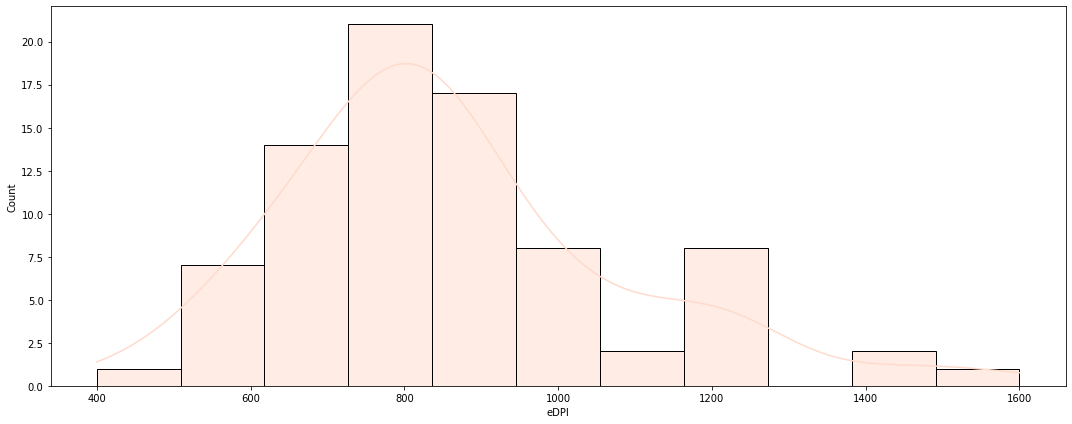

In [56]:
# Use seaborn to plot "eDPI" numbers
plt.figure(figsize=(15, 6))
sns.histplot(dataframe["eDPI"], kde=True)
plt.tight_layout()
plt.show()

## Plot Most Common Resolutions

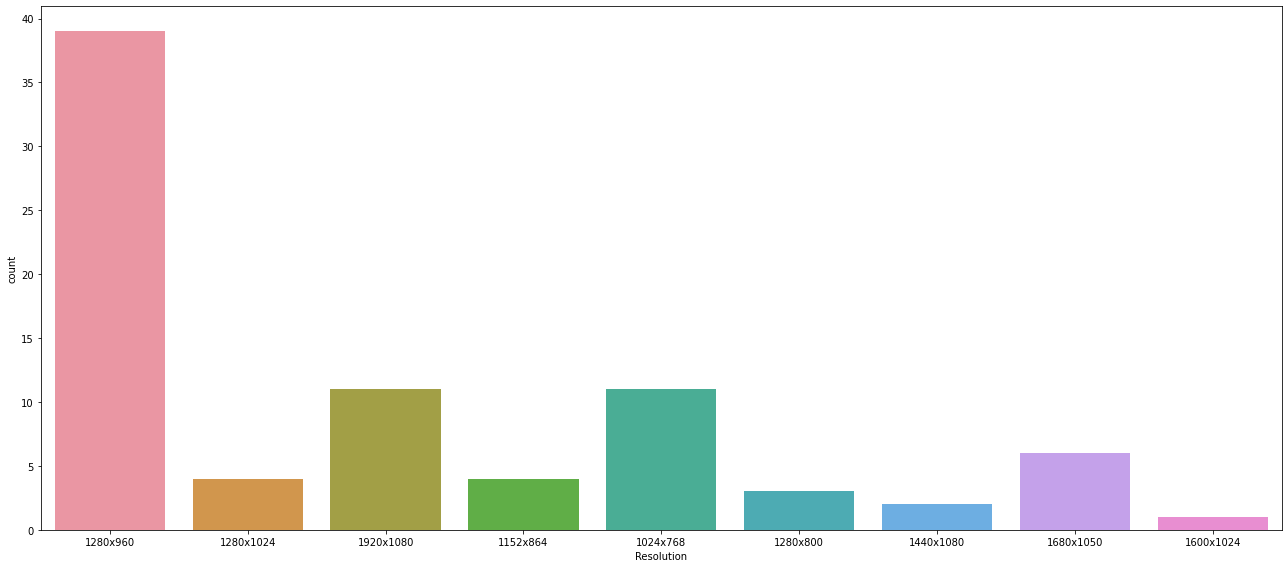

In [57]:
# Plot "Resolution" frequencies
plt.figure(figsize=(18, 8))
sns.countplot(x=dataframe["Resolution"])
plt.tight_layout()
plt.show()

In [58]:
# Show which players are using "1920x1080" "Resolution"
dataframe[dataframe["Resolution"] == "1920x1080"]["Player"]

8      karrigan
12         ropz
20     kscerato
21          arT
24      refrezh
30      Plopski
31          REZ
36       tizian
38       tabseN
85       magixx
193       mopoz
Name: Player, dtype: object

## Plot Scaling Mode

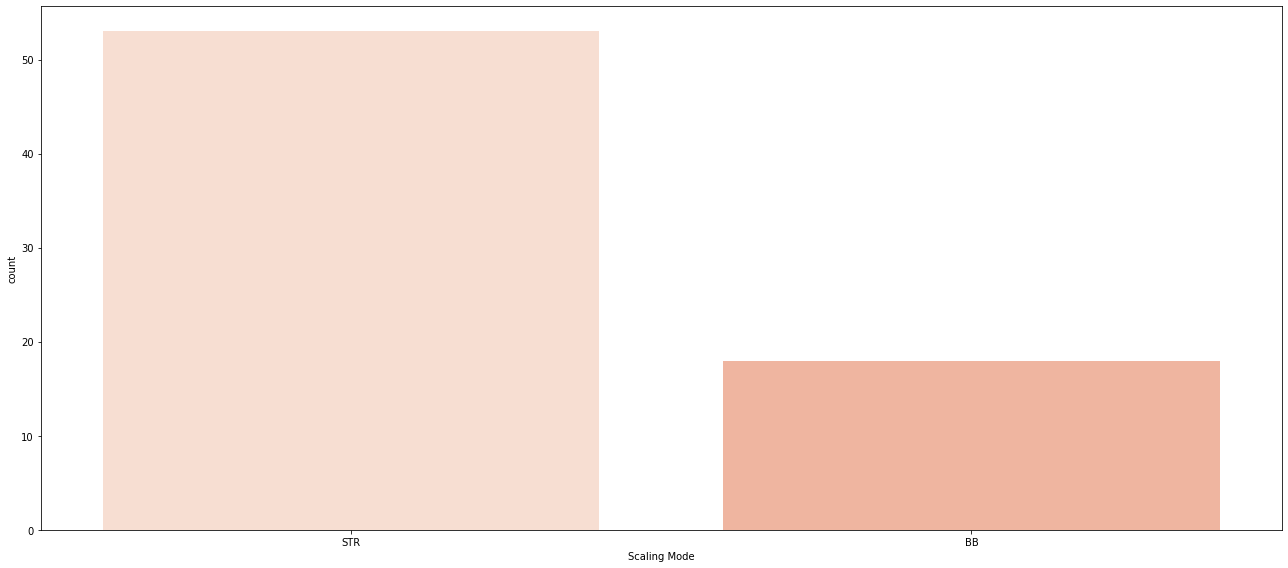

In [64]:
# Plot "Scaling Mode" frequencies
plt.figure(figsize=(18, 8))
sns.countplot(x=dataframe["Scaling Mode"])
plt.tight_layout()
plt.show()

In [63]:
# show players using "Scaling Mode" "STR"
dataframe[dataframe["Scaling Mode"] == "BB"]["Player"]

13        Ax1Le
15        sh1ro
25        stavn
26        teses
29       dev1ce
43       kennyS
50       k0nfig
52        Xyp9x
55       Magisk
58     misutaaa
66        nitr0
68         shox
87      chopper
93        dycha
167      Frozen
171        acoR
190    SunPayus
211        NBK-
Name: Player, dtype: object

## Plot Mouse

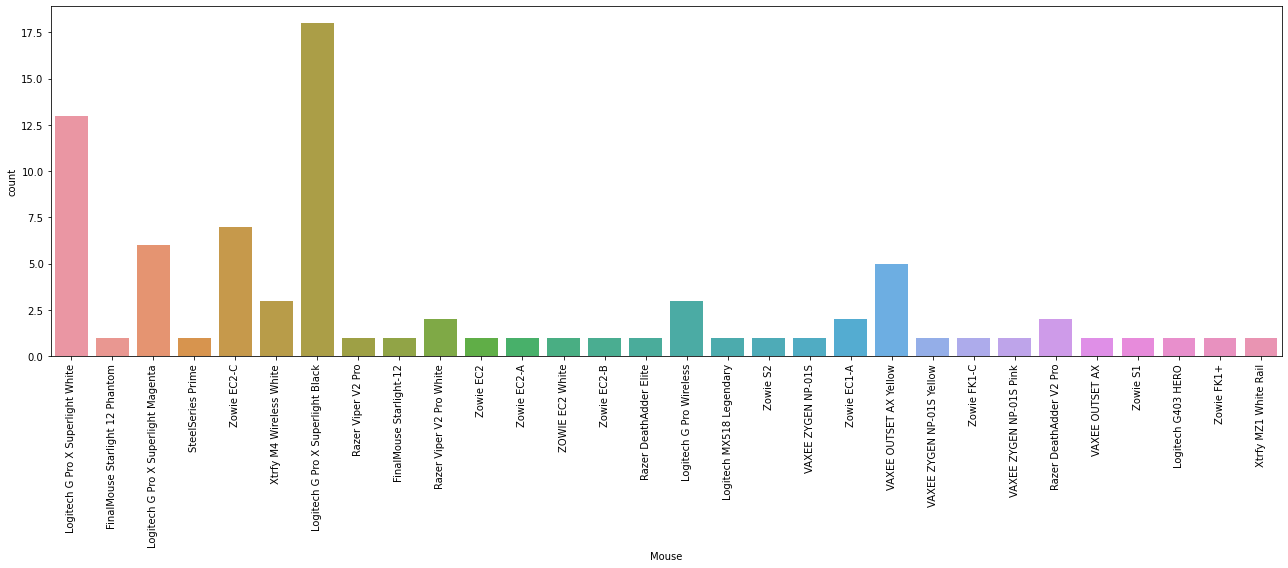

In [74]:
# Plot "Mouse" frequencies, rotate x-axis labels to be vertical
plt.figure(figsize=(18, 8))
sns.countplot(x=dataframe["Mouse"])
plt.tick_params(axis="x", rotation=90)
plt.tight_layout()
plt.show()